# Stub file to get things working

In [1]:
# Check we are using the right environment
import sys
print(sys.executable)

/home/brian/anaconda3/envs/facies_net/bin/python


In [2]:
from pathlib import Path
HOME_PATH = Path.home()
DATA_PATH = Path.home().joinpath('data')
CODE_PATH = Path.home().joinpath('code')
CLASSES_PATH = CODE_PATH.joinpath('seispredcode').joinpath('facies_net').joinpath('class_addresses')

In [3]:
# Initial package imports per facies_net file
import random
import numpy as np
import keras

# Random seed for reproducibility
np.random.seed(7)

# Check on keras backend (using tensorflow)
keras.backend.backend()

Using TensorFlow backend.


'tensorflow'

In [4]:
# Package imports from facies_net code
from facies_net_func.masterf import *

In [5]:
np.random.seed(7)

In [6]:
filenames = [str(DATA_PATH.joinpath('f3').joinpath('F3_entire.segy'))]
cube_incr = 30

In [7]:
class_filenames = [
 'multi_else_ilxl.pts'
,'multi_grizzly_ilxl.pts'
,'multi_high_amp_continuous_ilxl.pts'
,'multi_high_amplitude_ilxl.pts'
,'multi_high_amplitude_utm.pts'
,'multi_low_amp_dips_ilxl.pts'
,'multi_low_amplitude_ilxl.pts'
,'multi_low_coherency_ilxl.pts'
,'multi_salt_ilxl.pts'
,'multi_steep_dips_ilxl.pts'
,'Other_ilxl.pts'
]

In [8]:
class_files = [str(CLASSES_PATH.joinpath(f)) for f in class_filenames]
# Weighting of loss function to classes; must contain all classes in input data  
class_weights = None
# Should be the same as uniform allocation of weights, e.g. class_weights = {i:1.0 for i in np.arange(len(class_files))}

In [9]:
model_save_location = CODE_PATH.joinpath('F3').joinpath('BE_TEST_MODEL').relative_to(CODE_PATH)
prediction_save_location = CODE_PATH.joinpath('predictions').joinpath('BE_TEST_PREDS').relative_to(CODE_PATH)

In [10]:
train_dict = {
    'files'         : class_files,
    'epochs'        : 10,       # number of epochs we run on each training ensemble/mini-batch
    'num_train_ex'  : 80000,    # number of training examples in each training epoch
    'batch_size'    : 32,       # number of training examples fed to the optimizer as a batch
    'val_split'     : 0.3,      # fraction of examples used for validation
    'opt_patience'  : 10,       # number of epochs with the same accuracy before force breaking the training ensemble/mini-batch
    'class_weights' : class_weights,     # optional weight dict to weight loss function
    'data_augmentation' : ['None'],    # whether or not we are using data augmentation
    'save_model'    : True,         # whether or not we are saving the trained model
    'save_location' : str(model_save_location)    # file name for the saved trained model
}

In [11]:
train_dict = {
    'files'         : class_files,
    'epochs'        : 1,       # number of epochs we run on each training ensemble/mini-batch
    'num_train_ex'  : 800,    # number of training examples in each training epoch
    'batch_size'    : 32,       # number of training examples fed to the optimizer as a batch
    'val_split'     : 0.3,      # fraction of examples used for validation
    'opt_patience'  : 10,       # number of epochs with the same accuracy before force breaking the training ensemble/mini-batch
    'class_weights' : class_weights,     # optional weight dict to weight loss function
    'data_augmentation' : ['None'],    # whether or not we are using data augmentation
    'save_model'    : True,         # whether or not we are saving the trained model
    'save_location' : str(model_save_location)    # file name for the saved trained model
}

In [12]:
# Define the dictionary holding all the prediction parameters
pred_dict = {
    'keras_model'   : None, #keras.models.load_model('F3/10_epochs_80000_examples.h5'), # input model to be used for prediction, to load a model use: keras.models.load_model('write_location')
    'section_edge'  : np.asarray([300, 400, 350, 1200, 150, 1700]), # inline and xline section to be predicted (all depths), must contain xline
    'show_feature'  : False,     # Show the distinct features before they are combined to a prediction
    'xline'         : 775,      # xline used for classification (index)(should be within section range)
    'num_class'     : len(train_dict['files']),     # number of classes to output
    'cord_syst'     : 'segy',   # Coordinate system used, default is 0,0. Set to 'segy' to give inputs in (inline,xline)
    'save_pred'     : True,    # Save the prediction as a segy-cube
    'save_location' : str(prediction_save_location),       # file name for the saved prediction
    'pred_batch'    : 1        # number of traces used to make batches of mini-cubes that are stored in memory at once
    #'pred_batch' : train_dict['num_train_ex']//(pred_dict['section_edge'][5]-pred_dict['section_edge'][4])    #Suggested value
}

In [13]:
# Define the dictionary holding all the prediction parameters
pred_dict = {
    'keras_model'   : keras.models.load_model(str(model_save_location.with_suffix('.h5'))), #keras.models.load_model('F3/10_epochs_80000_examples.h5'), # input model to be used for prediction, to load a model use: keras.models.load_model('write_location')
    'section_edge'  : np.asarray([700, 701, 350, 1200, 900, 1200]), # inline and xline section to be predicted (all depths), must contain xline
    'show_feature'  : False,     # Show the distinct features before they are combined to a prediction
    'xline'         : 775,      # xline used for classification (index)(should be within section range)
    'num_class'     : len(train_dict['files']),     # number of classes to output
    'cord_syst'     : 'segy',   # Coordinate system used, default is 0,0. Set to 'segy' to give inputs in (inline,xline)
    'save_pred'     : True,    # Save the prediction as a segy-cube
    'save_location' : str(prediction_save_location),       # file name for the saved prediction
    'pred_batch'    : 1        # number of traces used to make batches of mini-cubes that are stored in memory at once
    #'pred_batch' : train_dict['num_train_ex']//(pred_dict['section_edge'][5]-pred_dict['section_edge'][4])    #Suggested value
}

Using uploaded model for prediction
Retrieving to memory:
inline-num: 1 / 2
xline-num: 1 / 851
Making prediction on sub-section:
Section finished!
Approximate time remaining of the prediction: 2.0  hrs.,  8.707849860191345  min., 
Retrieving to memory:
xline-num: 2 / 851
Making prediction on sub-section:
Section finished!
Approximate time remaining of the prediction: 2.0  hrs.,  8.63218386967977  min., 
Retrieving to memory:
xline-num: 3 / 851
Making prediction on sub-section:
Section finished!
Approximate time remaining of the prediction: 2.0  hrs.,  8.556517879168192  min., 
Retrieving to memory:
xline-num: 4 / 851
Making prediction on sub-section:
Section finished!
Approximate time remaining of the prediction: 2.0  hrs.,  8.480851888656616  min., 
Retrieving to memory:
xline-num: 5 / 851
Making prediction on sub-section:
Section finished!
Approximate time remaining of the prediction: 2.0  hrs.,  8.40518589814504  min., 
Retrieving to memory:
xline-num: 6 / 851
Making prediction on s

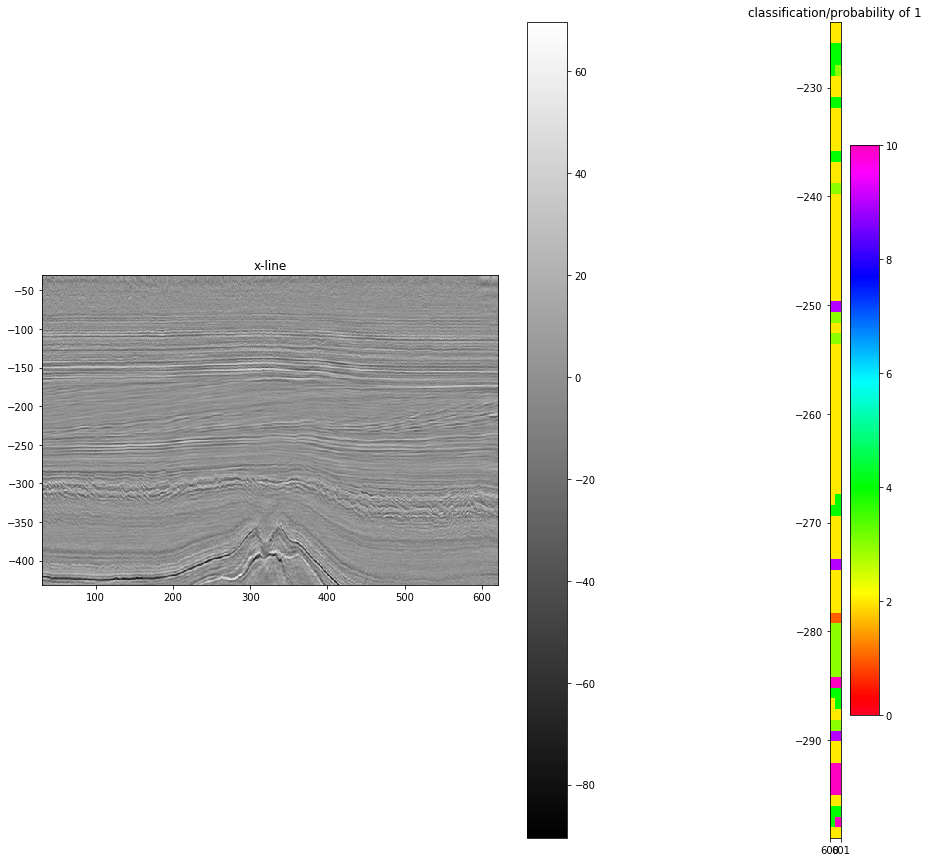

Total time elapsed during prediction and saving: 284.70207142829895  sec.


In [14]:
output_dict1 = master(
    segy_filename   = filenames,    # Seismic filenames
    cube_incr       = cube_incr,    # Increments in each direction to create a training cube
    train_dict      = train_dict,   # Input training dictionary
    pred_dict       = pred_dict,    # Input prediction dictionary
    mode            = 'predict'     # Input mode ('train', 'predict', or 'full' for both training AND prediction)
)

In [15]:
output_dict1

{'model': <keras.engine.sequential.Sequential at 0x7fb0942c9e80>,
 'pred': array([[[[ 8.,  8.,  8., ...,  8.,  8.,  8.],
          [ 7.,  7.,  7., ...,  7.,  7.,  7.],
          [ 6.,  6.,  6., ...,  6.,  6.,  6.],
          ...,
          [ 8.,  8.,  8., ...,  8.,  8.,  8.],
          [ 6.,  6.,  6., ...,  6.,  6.,  6.],
          [ 8.,  8.,  8., ...,  8.,  8.,  8.]],
 
         [[ 8.,  8.,  8., ...,  8.,  8.,  8.],
          [ 8.,  8.,  8., ...,  8.,  8.,  8.],
          [ 6.,  6.,  6., ...,  6.,  6.,  6.],
          ...,
          [ 8.,  8.,  8., ...,  8.,  8.,  8.],
          [ 6.,  6.,  6., ...,  6.,  6.,  6.],
          [ 8.,  8.,  8., ...,  8.,  8.,  8.]],
 
         [[ 6.,  6.,  6., ...,  6.,  6.,  6.],
          [ 8.,  8.,  8., ...,  8.,  8.,  8.],
          [ 6.,  6.,  6., ...,  6.,  6.,  6.],
          ...,
          [ 8.,  8.,  8., ...,  8.,  8.,  8.],
          [ 6.,  6.,  6., ...,  6.,  6.,  6.],
          [ 8.,  8.,  8., ...,  8.,  8.,  8.]],
 
         ...,
 
         [